<a href="https://colab.research.google.com/github/esther-nyokabi/Healthcare-Fraud-Detection/blob/main/HEALTHCARE_FRAUD_DETECTION_RESEARVH_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project : Healthcare Fraud Detection**




**Understanding the Context**


Healthcare fraud is considered a challenge for many societies. Health care funding that could be spent on medicine, care for the elderly, or emergency room visits is instead lost to fraudulent activities by materialistic practitioners or patients. With rising healthcare costs, healthcare fraud is a major contributor to these increasing healthcare costs.


**Defining the Question**

How can we detect and mitigate health care fraud 

**Metric of Success**

The success of the project will be measured based on the accuracy of the unsupervised machine learning model in detecting and mitigating healthcare fraud. The Silhouette score and Davies-Bouldin score will be used to evaluate the performance of the developed model.

The Silhouette score measures how similar an object is to its cluster compared to other clusters. A higher Silhouette score indicates that the objects within a cluster are more similar to each other than to the objects in other clusters. Therefore, we aim to achieve a Silhouette score of at least 0.6 for the developed model.

The Davies-Bouldin score is the average similarity between each cluster with its most similar cluster, where a lower score indicates better clustering. Therefore, we aim to achieve a Davies-Bouldin score of less than 0.8 for the developed model.

**The Experimental Design**
*   Data Preprocessing
*   Exploratory data analysis
*   Model Selection 
*   Training/Testing the model
*   Model Evaluation
*   Key Findings
*   Recommendations






# **DATA PREPROCESSING**

In [ ]:
from google.colab import drive

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset
df = pd.read_csv('HealthCare Providers (1).csv')
# Preview of the dataset
df.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,NaN,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


In [ ]:
df.shape

(100000, 27)

The dataset has 100,000 rows and 27 columns

## **DATA CLEANING**

We carry out a stepwise Data Cleaning Process before the analysis of the data can begin

In [ ]:
# Checking for duplicates
df["index"].duplicated().sum()

13

There are 13 entries that have been duplicated in the dataset. We shall drop these entries.

In [ ]:
# Dropping the duplicates
df = df.drop_duplicates(subset=['index'])

Based on the dataset we have, some entries relate to organizations and some to individuals. Therefore where entries relate to organizations, we have null values for individuals and vice versa. This affects the first name, last name, Middle initial and gender columns. We shall drop this in our analysis. We shall also drop street address 2 since we already have street address 1.


In [ ]:
# Dropping columns
New_df = df.drop(["Last Name/Organization Name of the Provider",	"First Name of the Provider",	"Middle Initial of the Provider",	"Gender of the Provider","Street Address 2 of the Provider"],axis=1)
New_df.head()

,index,National Provider Identifier,Credentials of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,M.D.,I,1402 S GRAND BLVD,SAINT LOUIS,631041004.0,MO,US,Internal Medicine,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,3354385,1346202256,M.D.,I,NaN,FAYETTEVILLE,283043815.0,NC,US,Obstetrics & Gynecology,...,G0202,"Screening mammography, bilateral (2-view study...",N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,3001884,1306820956,DPM,I,20 WASHINGTON AVE,NORTH HAVEN,64732343.0,CT,US,Podiatry,...,99348,"Established patient home visit, typically 25 m...",N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,7594822,1770523540,MD,I,5746 N BROADWAY ST,KANSAS CITY,641183998.0,MO,US,Internal Medicine,...,81002,"Urinalysis, manual test",N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,746159,1073627758,DO,I,875 MILITARY TRL,NaN,334585700.0,FL,US,Internal Medicine,...,96372,Injection beneath the skin or into muscle for ...,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


In [ ]:
# Checking for null values
New_df.isnull().sum()

index                                                          0
National Provider Identifier                                   0
Credentials of the Provider                                 7206
Entity Type of the Provider                                    1
Street Address 1 of the Provider                               3
City of the Provider                                           3
Zip Code of the Provider                                       2
State Code of the Provider                                     1
Country Code of the Provider                                   2
Provider Type                                                  2
Medicare Participation Indicator                               1
Place of Service                                               1
HCPCS Code                                                     0
HCPCS Description                                              1
HCPCS Drug Indicator                                           0
Number of Services       

Since the credentials column has the most missing values, we shall fill these with 'org' being organization. 
As for the other missing values, we shall drop since they are few and will not affect our dataset. 

In [ ]:
New_df['Entity Type of the Provider'].value_counts()

I    95733
O     4253
Name: Entity Type of the Provider, dtype: int64

In [ ]:
#Filling Null Values
New_df["Credentials of the Provider"].fillna(value = "Org")

0        M.D.
1        M.D.
2         DPM
3          MD
4          DO
         ... 
99995      PT
99996    ARNP
99997    M.D.
99998     Org
99999     Org
Name: Credentials of the Provider, Length: 99987, dtype: object

In [ ]:
# Dropping the missing values in the other columns
New_df.ffill(inplace=True)
New_df.isna().sum()

index                                                       0
National Provider Identifier                                0
Credentials of the Provider                                 0
Entity Type of the Provider                                 0
Street Address 1 of the Provider                            0
City of the Provider                                        0
Zip Code of the Provider                                    0
State Code of the Provider                                  0
Country Code of the Provider                                0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Code                                                  0
HCPCS Description                                           0
HCPCS Drug Indicator                                        0
Number of Services                                          0
Number o

In [ ]:
# Checking the data types in the dataset
New_df.dtypes

index                                                         int64
National Provider Identifier                                  int64
Credentials of the Provider                                  object
Entity Type of the Provider                                  object
Street Address 1 of the Provider                             object
City of the Provider                                         object
Zip Code of the Provider                                     object
State Code of the Provider                                   object
Country Code of the Provider                                 object
Provider Type                                                object
Medicare Participation Indicator                             object
Place of Service                                             object
HCPCS Code                                                   object
HCPCS Description                                            object
HCPCS Drug Indicator                            

Only 3 columns do not have to correct data type. We shall amend these accordngly. 

In [ ]:
# Changing the data types
New_df["Number of Services"].astype(int)
New_df["Number of Medicare Beneficiaries"].astype(int)
New_df["Number of Distinct Medicare Beneficiary/Per Day Services"].astype(int)

0         27
1        175
2         32
3         20
4         31
        ... 
99995     20
99996    136
99997     11
99998     12
99999    587
Name: Number of Distinct Medicare Beneficiary/Per Day Services, Length: 99987, dtype: int64

**Checking for anomalies**

In [ ]:

# Checking for outliers in the categorical variables
cat_vars = ['Credentials of the Provider','Entity Type of the Provider','Street Address 1 of the Provider']

for var in cat_vars:
  counts = New_df[var].value_counts()
  print(f"\n{var}:\n{counts}")


Credentials of the Provider:
MD                   35412
M.D.                 35278
D.O.                  3823
DO                    2662
PA-C                  1992
                     ...  
D.P.M., M.S.             1
MD,FACC,FASE,FAHA        1
MD, PHD, DSC             1
D.O., M.B.A.             1
PT,DPTATC                1
Name: Credentials of the Provider, Length: 1853, dtype: int64

Entity Type of the Provider:
I    95734
O     4253
Name: Entity Type of the Provider, dtype: int64

Street Address 1 of the Provider:
200 1ST ST SW                244
9500 EUCLID AVE              153
5323 HARRY HINES BLVD        104
200 HAWKINS DR               104
75 FRANCIS ST                102
                            ... 
1022 STORRS RD                 1
541 W. COLLEGE STREET          1
550 WARRENVILLE RD             1
72780 COUNTRY CLUB DRIVE       1
444 MIDDLE NECK RD APT 1H      1
Name: Street Address 1 of the Provider, Length: 51924, dtype: int64


In [ ]:
cat_vars2 = ['City of the Provider','Zip Code of the Provider','State Code of the Provider','Country Code of the Provider']
for var in cat_vars2:
  counts = New_df[var].value_counts()
  print(f"\n{var}:\n{counts}")


City of the Provider:
NEW YORK          1061
HOUSTON            874
CHICAGO            759
PHILADELPHIA       658
BOSTON             634
                  ... 
PASS CHRISTIAN       1
BLUFF CITY           1
HAWLEY               1
PEYTON               1
HOOPER BAY           1
Name: City of the Provider, Length: 5846, dtype: int64

Zip Code of the Provider:
559050001.0    150
441950001.0    114
559050001       74
943052200.0     67
532263522.0     66
              ... 
760226986        1
432143463        1
801126003        1
635015362        1
11023            1
Name: Zip Code of the Provider, Length: 58159, dtype: int64

State Code of the Provider:
CA    7774
FL    7262
TX    6861
NY    6360
PA    4560
IL    4073
NC    3725
OH    3661
MI    3516
NJ    3332
GA    2858
VA    2792
MA    2790
TN    2673
IN    2204
MD    2075
WA    2020
MO    1997
AZ    1993
WI    1838
AL    1821
SC    1753
KY    1666
MN    1562
LA    1520
CO    1423
CT    1403
OK    1250
IA    1136
AR    1130
KS    1109
MS 

In [ ]:
cat_vars3 = ['Provider Type','Medicare Participation Indicator','Place of Service','HCPCS Code','HCPCS Description','HCPCS Drug Indicator']
for var in cat_vars3:
  counts = New_df[var].value_counts()
  print(f"\n{var}:\n{counts}")


Provider Type:
Diagnostic Radiology                                12536
Internal Medicine                                   11363
Family Practice                                      9757
Nurse Practitioner                                   5713
Cardiology                                           4601
                                                    ...  
Certified Nurse Midwife                                 7
Radiation Therapy Center                                3
Mammography Center                                      3
Pharmacy                                                1
Advanced Heart Failure and Transplant Cardiology        1
Name: Provider Type, Length: 90, dtype: int64

Medicare Participation Indicator:
Y     99955
N        31
3w        1
Name: Medicare Participation Indicator, dtype: int64

Place of Service:
O    61608
F    38379
Name: Place of Service, dtype: int64

HCPCS Code:
99213    4578
99214    4400
99232    1850
99203    1846
99204    1743
         ... 
4

The below are outliers in the categorical variables in the dataset; 

- ?? state code
- USS,AVGG,B%3 in country code


In [ ]:
# Dealing with outliers
counts = New_df['State Code of the Provider'].value_counts()
counts2 = New_df['Country Code of the Provider'].value_counts()
threshold1 = 1
threshold2 = 5

# identify the categories that are outliers
outliers1 = counts[counts < threshold1].index
outliers2=  counts2[counts2 < threshold2].index
# remove the outlier categories from the dataframe
New1_df = New_df[~New_df['State Code of the Provider'].isin(outliers1)]
New2_df = New1_df[~New_df['Country Code of the Provider'].isin(outliers2)]
New3_df = New2_df[~New_df['Medicare Participation Indicator'].isin(outliers1)]

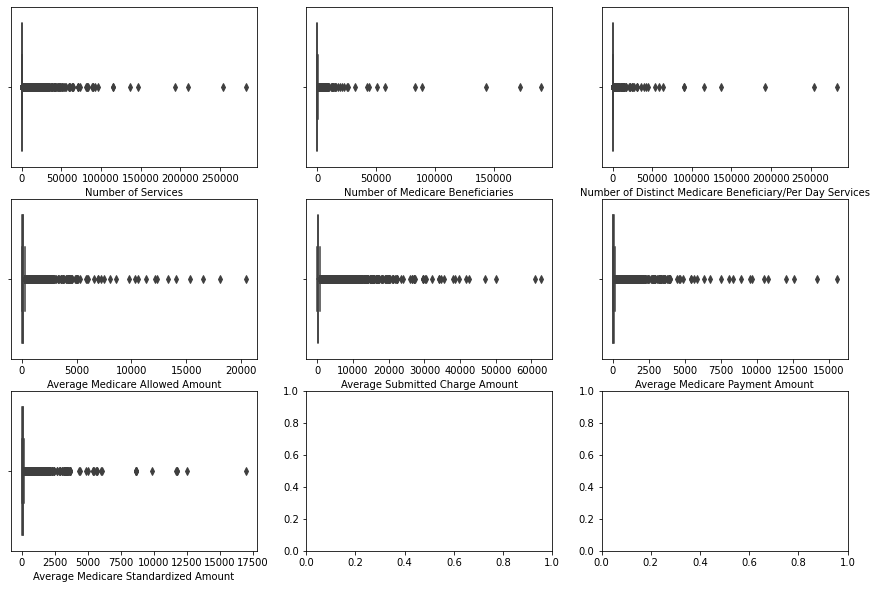

In [ ]:
# Outliers in the numerical variables
Num_var = ['Number of Services','Number of Medicare Beneficiaries','Number of Distinct Medicare Beneficiary/Per Day Services','Average Medicare Allowed Amount','Average Submitted Charge Amount','Average Medicare Payment Amount','Average Medicare Standardized Amount']
fig,axes = plt.subplots(nrows=3, ncols=3,figsize = (15,10))
for ax, data, column in zip (axes.flatten(),New3_df,Num_var):
  sns.boxplot(New3_df[column],ax=ax)

We shall maintain all the outliers in the data since they will be crucial for our model to identify anomalies. 

# **EXPLORATORY DATA ANALYSIS**

##**UNIVARIATE ANALYSIS**

In [ ]:
# Statistical summary of the data.
New3_df.describe()

,index,National Provider Identifier,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
count,9.997500e+04,9.997500e+04,99975.000000,99975.000000,99975.000000,99975.000000,99975.000000,99975.000000,99975.000000
mean,4.907720e+06,1.498234e+09,233.236324,86.494300,139.487487,100.170620,352.343012,76.317063,76.916760
std,2.839668e+06,2.874157e+08,2393.829862,1097.227839,1625.567765,246.481524,1044.852983,191.236010,191.586673
min,2.090000e+02,1.003001e+09,11.000000,-31.047124,11.000000,0.010000,0.010000,0.008679,0.008679
25%,2.458842e+06,1.245670e+09,21.000000,17.000000,21.000000,25.230000,60.000000,20.247745,21.025385
50%,4.901271e+06,1.497847e+09,46.000000,32.000000,43.000000,66.700000,153.185185,47.816316,48.232969
75%,7.349914e+06,1.740376e+09,128.000000,72.000000,106.000000,110.900000,301.615260,82.672512,83.010000
max,9.847440e+06,1.993000e+09,282739.000000,190306.000000,282737.000000,20430.120000,62694.000000,15529.530000,16957.150000


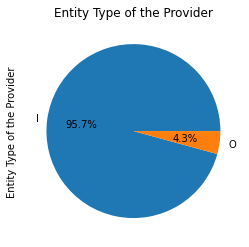

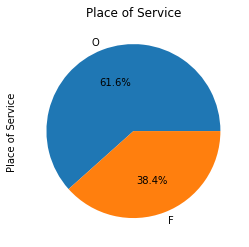

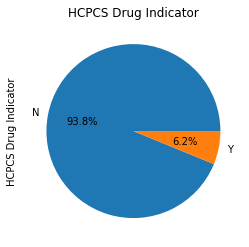

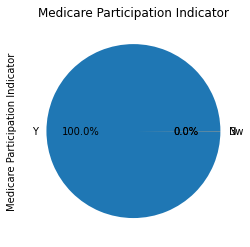

In [ ]:
Vars= ['Entity Type of the Provider','Place of Service','HCPCS Drug Indicator','Medicare Participation Indicator']
for var in Vars:
  counts = New3_df[var].value_counts()
  plt.figure()
  counts.plot(kind='pie',autopct='%1.1f%%')
  plt.title(var)
  # show the plot
  plt.show()

We can derive the following conclusions about our data;
- Most of the providers are individuals
- Most of the services offered are not listed on the Medicare Part B Drug Average Sales Price (ASP) File
- A Majority of the providers participates in Medicare and/or accepts the assigned assignment of Medicare allowed amounts

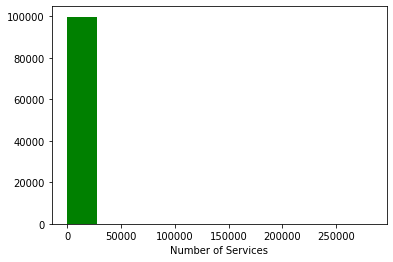

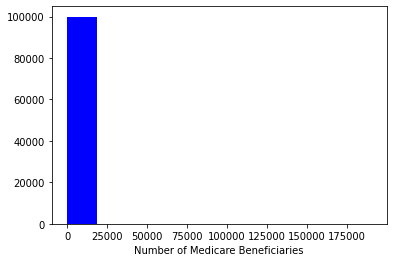

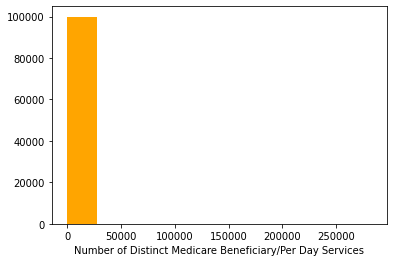

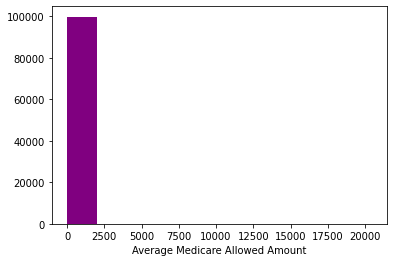

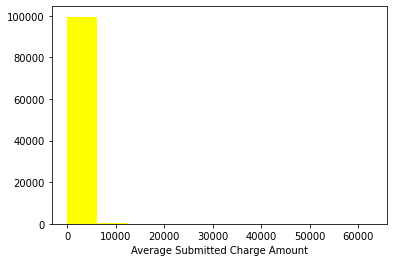

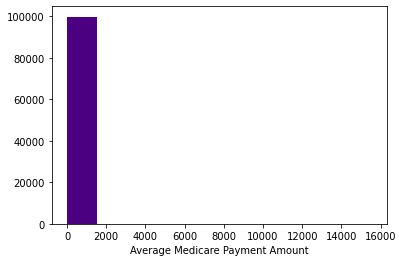

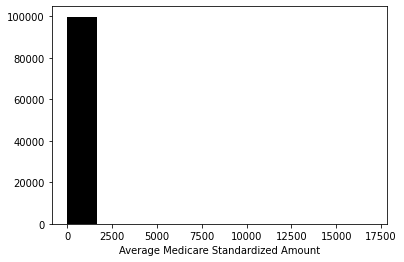

In [ ]:
Colors = ["Green","blue","Orange","purple","yellow","indigo","Black","Grey","pink","Brown","violet","Maroon","teal","lime"]
for i,var in enumerate(Num_var):
  plt.figure()
  plt.hist(New3_df[var],color=Colors[i])
  plt.xlabel(var)
  plt.show()

##**BIVARIATE ANALYSIS**

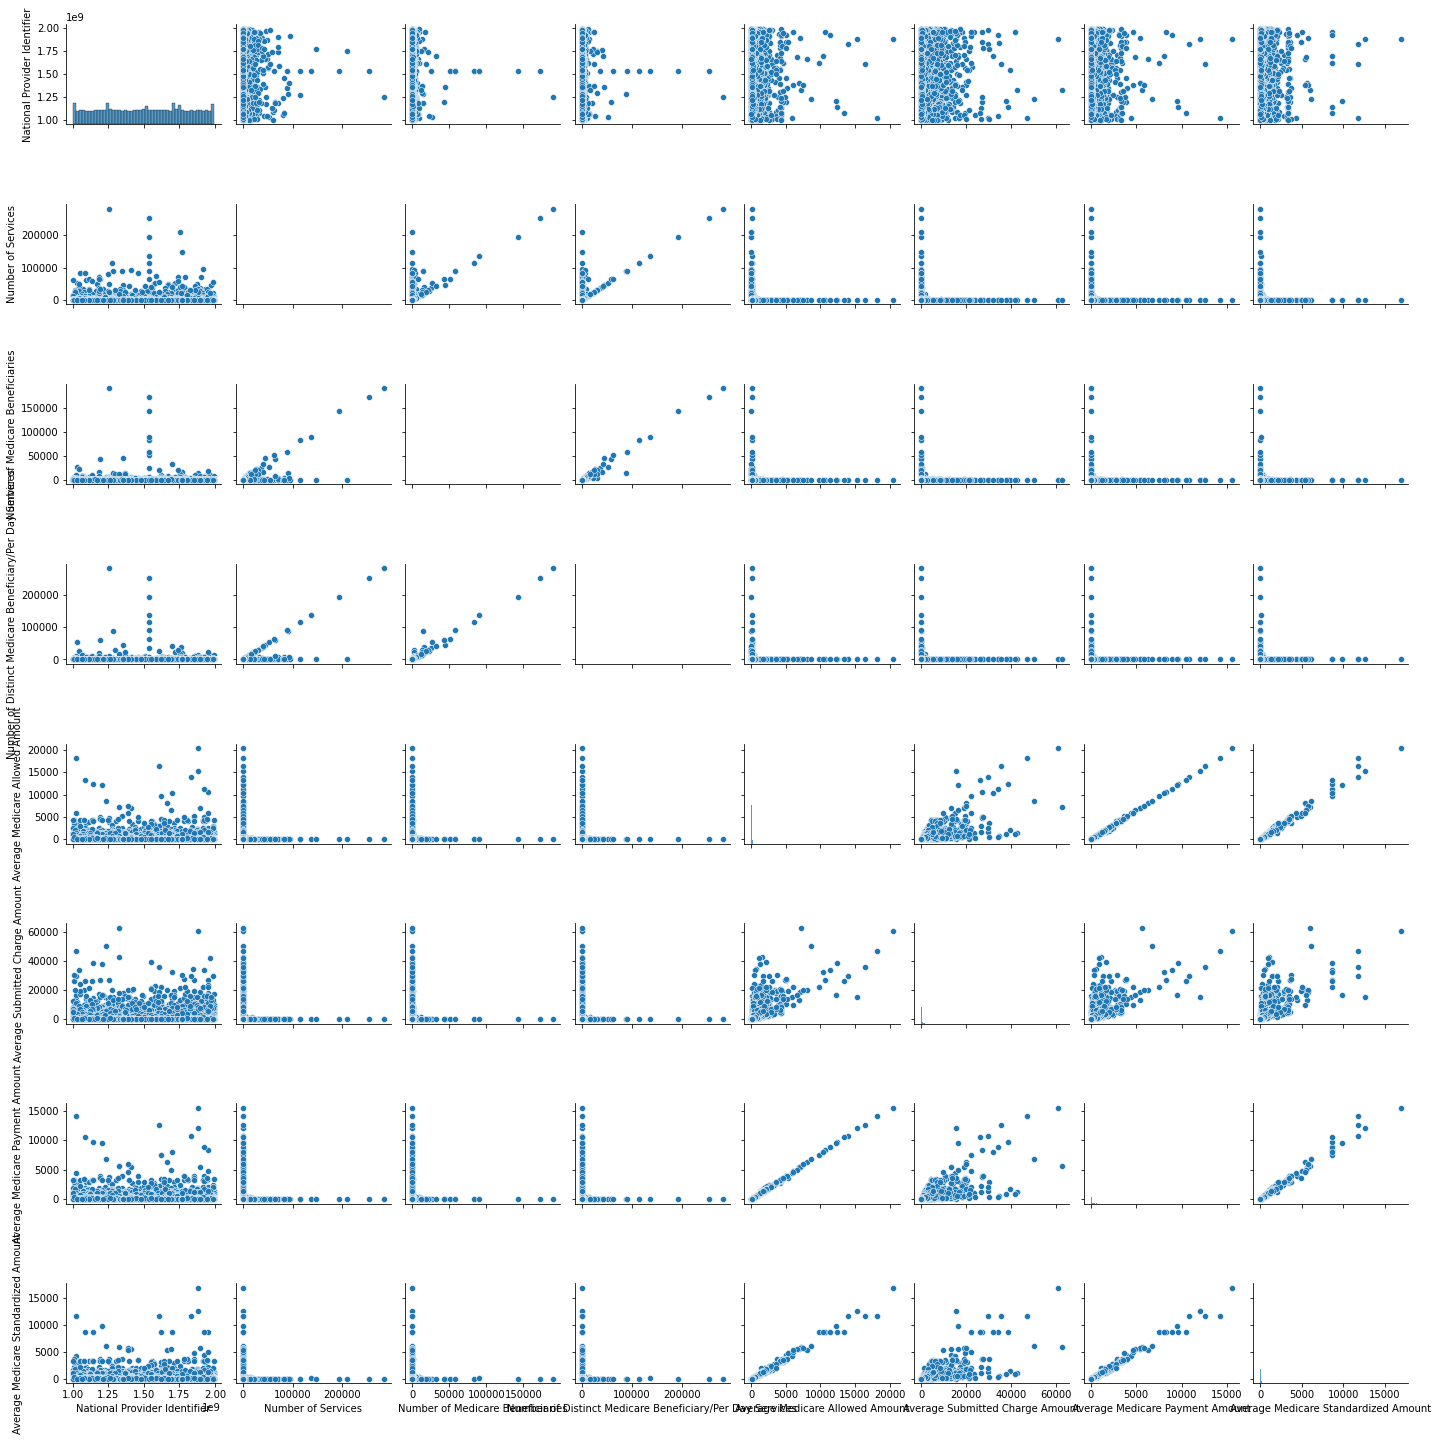

In [ ]:
New3_df1 = New3_df.drop(["index"],axis=1)
sns.pairplot(New3_df1)

- There is a positive correlation between the number of services and the number of medicare beneficiaries.
- The higher the average medicare standardized amount, the higher the Average Medicare Payment Amount.
- Similarly, the higher the average medicare standardized amount, the higher the Average Medicare Allowed Amount.


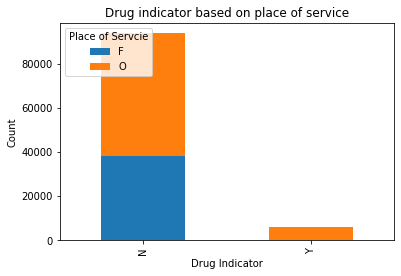

In [ ]:
cross_tab2 = pd.crosstab(New3_df["HCPCS Drug Indicator"], New3_df["Place of Service"])
stacked_bar = cross_tab2.plot(kind="bar", stacked=True)
plt.title("Drug indicator based on place of service")
plt.xlabel("Drug Indicator")
plt.ylabel("Count")
plt.legend(title="Place of Servcie", loc="upper left")
plt.show()

<AxesSubplot:>

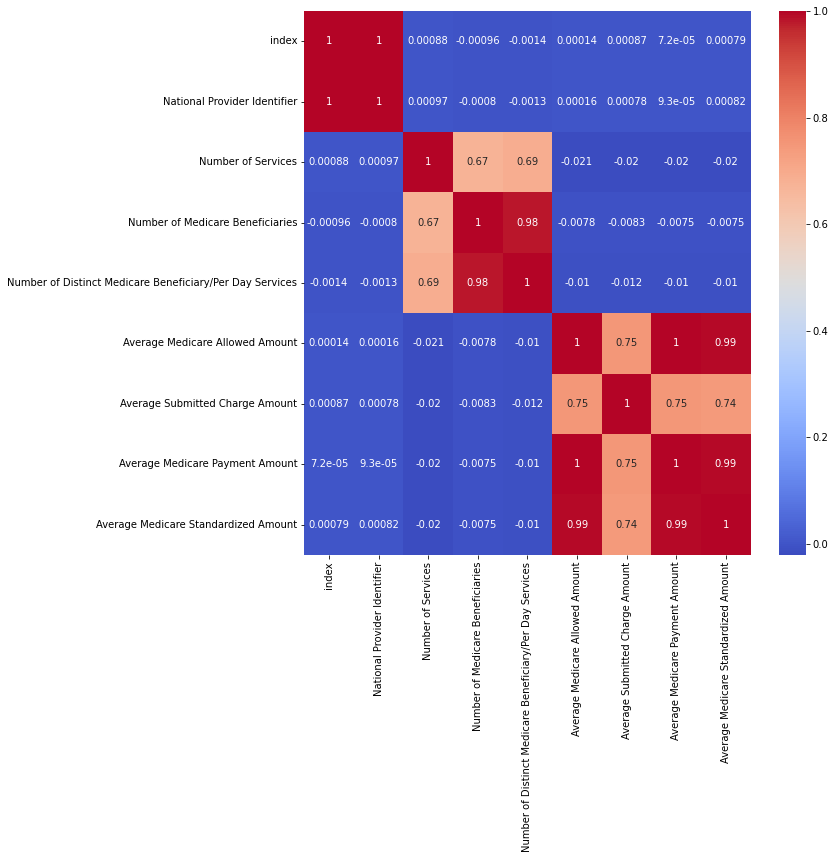

In [ ]:
# Visualization of the correlation of the variables
Corr_matrix = New3_df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(Corr_matrix, annot=True, cmap='coolwarm',ax=ax)

#**Model Selection**

We shall be using **K-Means** clustering algorithm which is distance based whereby the distance between a data point and centroid of the cluster is measured in order to assign a data point to a particular cluster.

Identify locally consistent and locally similar groups of hospitals, according to their characteristics and behavior treating a specific disease, in order to spot outliers within this groups of peers.

Initiated with k arbitrary cluster centres,it assigns every data point to its nearest center, and then readjusts the centers, reassigns the data points, until it stabilizes.

We shall also use **Anomaly detection** tos

In [ ]:
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

##**K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = New3_df.iloc[:,[19,20]].values # using the submitted and actual payment columns for easy visualization

In [ ]:
print(X)

[[305.2111111  157.2622222 ]
 [548.8        118.83      ]
 [155.          64.4396875 ]
 ...
 [109.5454546   14.09      ]
 [ 65.          29.93      ]
 [ 46.86757216  29.73687606]]


**Choosing number of clusters**

WCSS - Within Clusters Sum of Squares


In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init= "k-means++",random_state=200)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_) # Gives the wcss value for each cluster

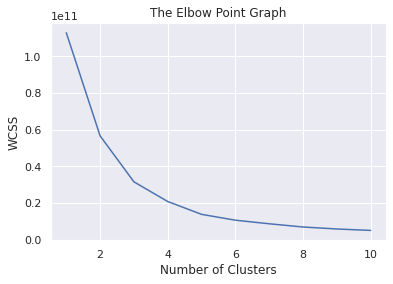

In [ ]:
# Plot an "Elbow" Graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

-The elbow shows that 5 is a good value for k so we visualize the result and fit our K-means algorithm.

**Training our model**

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=500)

# Return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

[0 0 0 ... 0 0 0]


**Making Predictions With Our K Means Clustering Model**

There are 2 methods:

Which cluster each data point belongs to
Where the center of each cluster is


*   Which cluster each data point belongs to
*   Where the center of each cluster is





In [ ]:
kmeans.labels_ # Using cluster

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

This generated a NumPy array with predictions for each data point

In [ ]:
kmeans.cluster_centers_ # Using center

array([[  186.36195998,    53.41408861],
       [ 5348.33669882,   786.16092085],
       [35419.50444444,  5260.94052156],
       [ 1546.20180647,   242.54771439],
       [14678.08404255,  1782.88038789]])

This generated a two-dimensional NumPy array that contains the coordinates of each clusters center.

**Visualizing all the clusters**

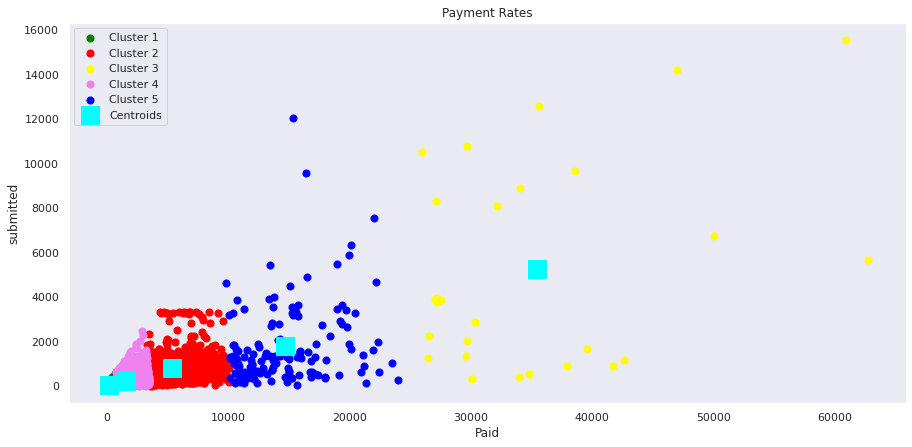

In [ ]:
# Plotting all clusters and their centroids

plt.figure(figsize = (15,7))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label = 'Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label = 'Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label = 'Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label = 'Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label = 'Cluster 5')

#plot the centroids

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='cyan', label = 'Centroids',marker=',')
plt.grid(False)
plt.title("Payment Rates")
plt.xlabel("Paid")
plt.ylabel("submitted")
plt.legend()
plt.show()

## Anomaly Detection

In [ ]:
from sklearn.covariance import EllipticEnvelope

# Extract the relevant columns
features = New3_df[['Number of Services', 'Number of Medicare Beneficiaries', 'Average Medicare Allowed Amount', 
                    'Average Medicare Payment Amount', 'Average Submitted Charge Amount']]

# Using the EllipticEnvelope model to identify potential outliers
model = EllipticEnvelope(contamination=0.01)
model.fit(features)
outliers = model.predict(features) == -1

# Identifying the rows with potential anomalies
anomalies = New3_df[outliers]

# Output of the results
print(f"Found {len(anomalies)} potential cases of healthcare fraud:")
print(anomalies)

The model successfully identified 1000 potential fraud cases, providing valuable insights for further investigation.

# Model Evaluation

We evaluate the K-means clustering model using the Silhouette score and Davies-Bouldin score.

The Silhouette score measures the degree of similarity between clusters, and the Davies-Bouldin score measures the degree of separation between clusters. 

In [ ]:
# Importing the necessary libraries
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
# Measuring the model performance using Silhouette score
silhouette_score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print(f"Silhouette score: {silhouette_score}")

The Silhouette score of 0.819 indicates that the clusters formed by the KMeans algorithm are well-separated and dense, with minimal overlap between the clusters.

This suggests that the algorithm has done a good job of grouping similar data points together and separating them from dissimilar points.

In [ ]:
# Measuring the model performance using Davies-Bouldin score
davies_bouldin_score = davies_bouldin_score(X, kmeans.labels_)
print(f"Davies-Bouldin score: {davies_bouldin_score}")

The Davies-Bouldin score of 0.546 indicates that the KMeans algorithm created clusters that are relatively compact and well-separated from each other.

This score is also an indicator of the algorithm's ability to separate data points that belong to different clusters.

# Key Findings



*  Positive correlation between number of services and number of medicare beneficiaries: This indicates that providers who offer more services tend to have more beneficiaries. This could potentially be a red flag for fraud, as it could indicate that a provider is falsely billing for services that were not actually provided.

*   Higher average Medicare standardized amount leads to higher Average Medicare Payment Amount and Average Medicare Allowed Amount: This finding suggests that providers who charge higher amounts for services tend to receive higher payments and allowed amounts from Medicare. This could indicate potential fraud, as providers may be overcharging for services or billing for services that were not actually provided.

*   Identified 1000 potential cases of healthcare fraud: These cases would need to be further investigated to determine if they are, in fact, instances of fraud and to take necessary actions to mitigate fraud.




# Recommendations



*   Monitor the number of services provided and ensure that they are necessary and reasonable.






*   Verify that the amount paid by Medicare is justified based on the services provided.
*   
Collaborate with law enforcement agencies to prosecute and penalize individuals who engage in healthcare fraud.
Conduct further investigation into the potential cases of healthcare fraud identified by the machine learning model.

*   
Implement measures to prevent healthcare fraud, such as improving billing practices, enhancing fraud detection technologies, and increasing education and awareness among healthcare providers and beneficiaries.

